In [4]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Define studied plots

In [53]:
monitored_runs = ["../results/LSTMConfig/20180307_214204/", 
                  "../results/LSTMConfig/20180307_224745/",
                  "../results/BiLSTMConfig/20180308_175823-65f4/",
                  "../results/LSTMConfig/20180313_160911-82ec/",
                  "../results/LSTMConfig/20180313_163146-e8b9/",
                  "../results/BiLSTMConfig/20180313_163146-e8b9/"
                 ]

labels = ["base LSTM", 
          "extra layer",
          "Bi-LSTM initial",
          "extra layer, learning rate * 10",
          "extra extra layer, learning rate * 100",
          "Bi-LSTM extra layer",]

In [54]:
class RunResult(object):
    def load_los_file(self, filename):
        values = []
        with open(self.runpath + filename, 'r') as f:
            for l in f:
                values.append(float(l.strip()))
        return values
    
    def filenames(self):
        return ["dev_f1.los", "dev_losses.los", "dev_precision.los", "dev_recall.los",
                "train_f1.los", "train_losses.los", "train_precision.los", "train_recall.los"]
    
    def __init__(self, runpath):
        self.runpath = runpath
        self.results_dic = {}
        for filename in self.filenames():
            self.results_dic[filename] = self.load_los_file(filename)
        with open(self.runpath + "params.json") as f:
            self.params = json.load(f)

In [55]:
all_results = [RunResult(monitored_run) for monitored_run in monitored_runs]

# Plots

### Train F1 evolution per config

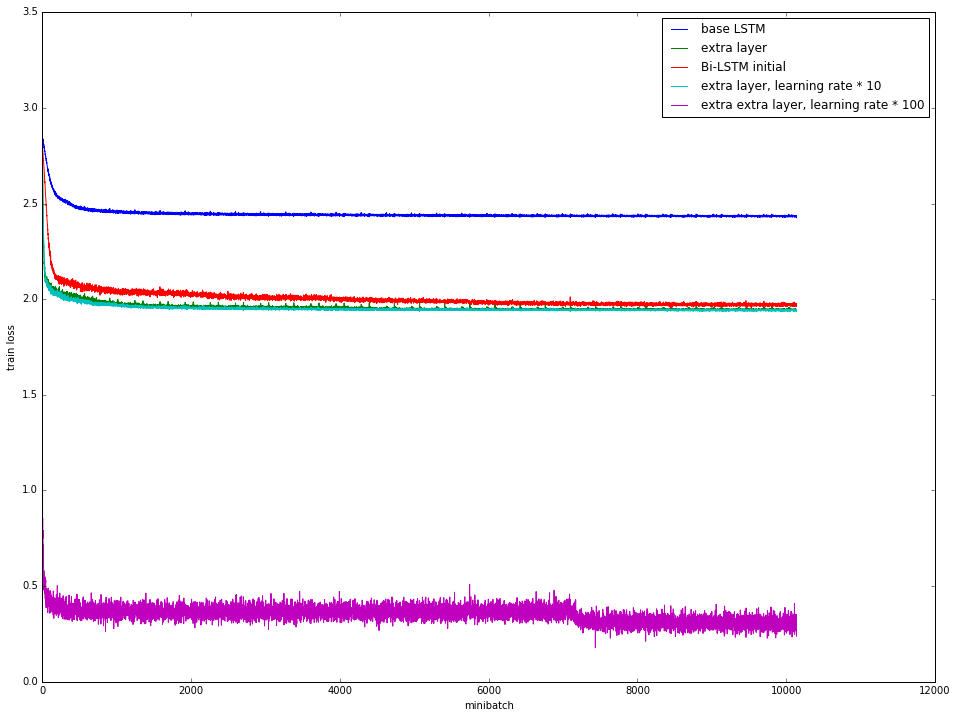

In [56]:
plt.figure(figsize = (16, 12))

for result, label in zip(all_results, labels):    
    plt.plot(result.results_dic["train_losses.los"], label = label)

plt.xlabel("minibatch")
plt.ylabel("train loss")
plt.legend()
    
#plt.ylim((0, 1))
plt.show()

### Train F1 evolution per config

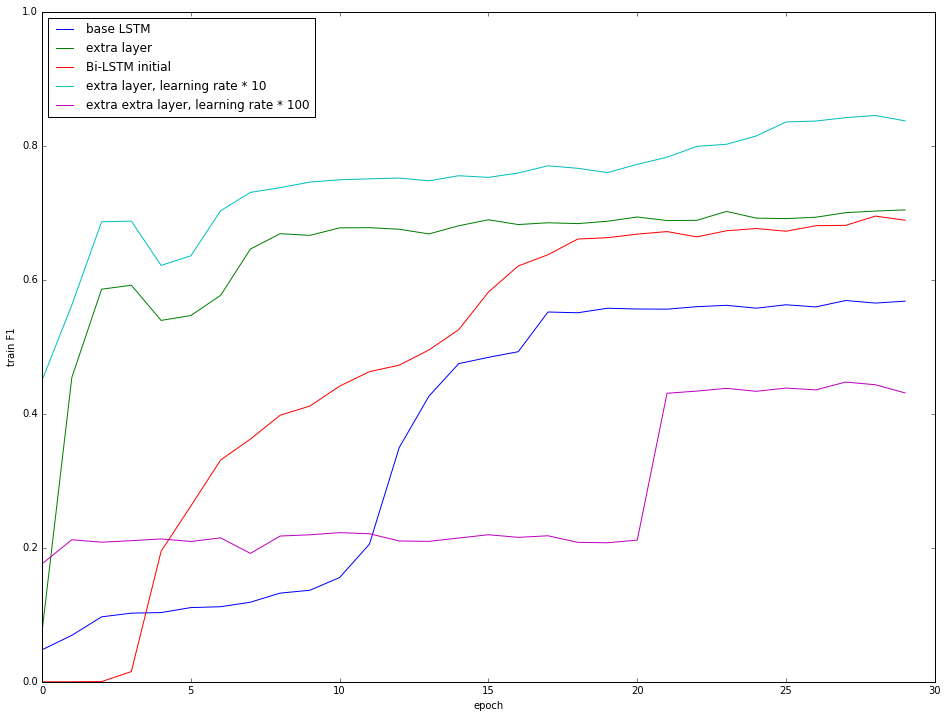

In [57]:
plt.figure(figsize = (16, 12))

for result, label in zip(all_results, labels):    
    plt.plot(result.results_dic["train_f1.los"], label = label)

plt.xlabel("epoch")
plt.ylabel("train F1")
plt.legend(loc="upper left")
    
plt.ylim((0, 1))
plt.show()